In [518]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [519]:
df=pd.read_csv("dataair.csv")
df.head()

C:\Users\Apeksha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [521]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [522]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [523]:
df['location']=df['location'].fillna(df['location'].mode())
df['type']=df['type'].fillna(df['type'].mode())


In [524]:
df.fillna(0, inplace=True)

In [525]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [526]:
df.duplicated().sum()

38995

In [527]:
df.drop_duplicates(inplace=True)

In [528]:
df.duplicated().sum()

0

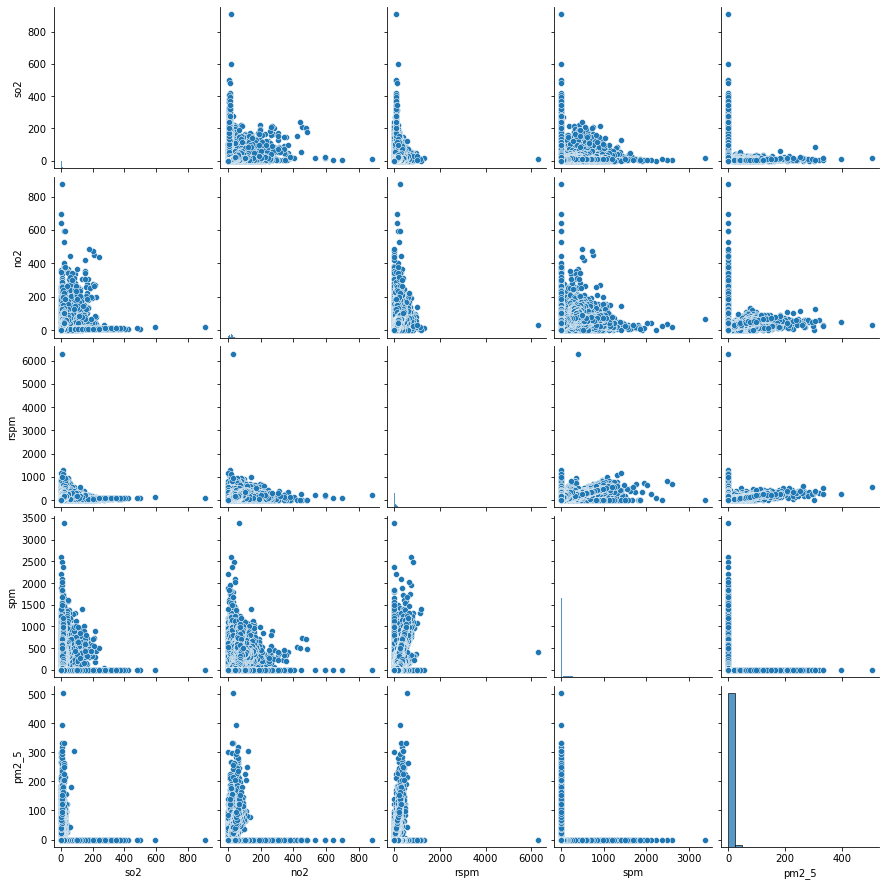

In [529]:
sns.pairplot(data=df)

<AxesSubplot:>

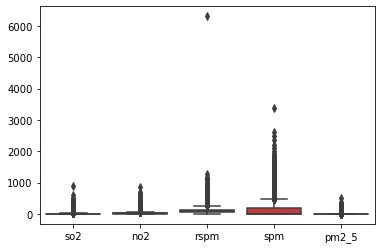

In [530]:
sns.boxplot(data=df)

<AxesSubplot:>

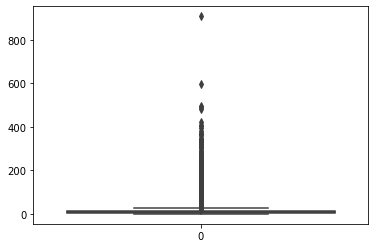

In [531]:
sns.boxplot(data=df.so2)

<AxesSubplot:>

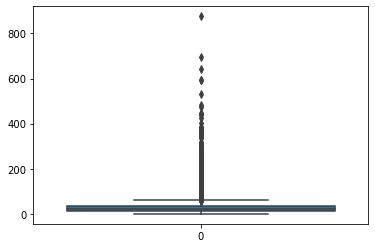

In [532]:
sns.boxplot(data=df.no2)

In [533]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5'], dtype='object')

<AxesSubplot:>

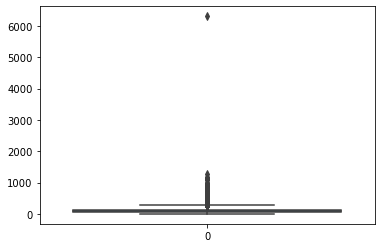

In [534]:
sns.boxplot(data=df.rspm)

In [535]:
q1=df['rspm'].quantile(0.25)
q3=df['rspm'].quantile(0.75)
IQR=q3-q1
l=q1-1.5*IQR
H=q1+1.5*IQR
df=df[(df.rspm>l)&(df.rspm<H)]

In [536]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,0,0,0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,0,0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

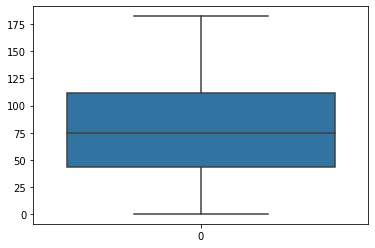

In [537]:
sns.boxplot(data=df.rspm)

In [538]:
q1=df['so2'].quantile(0.25)
q3=df['so2'].quantile(0.75)
IQR=q3-q1
df=df[(df.so2>l)&(df.so2<H)]


<AxesSubplot:>

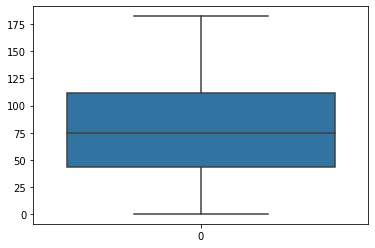

In [539]:
sns.boxplot(data=df.rspm)

In [540]:
q1=df['no2'].quantile(0.25)
q3=df['no2'].quantile(0.75)
IQR=q3-q1
df=df[(df.no2>l)&(df.no2<H)]


<AxesSubplot:>

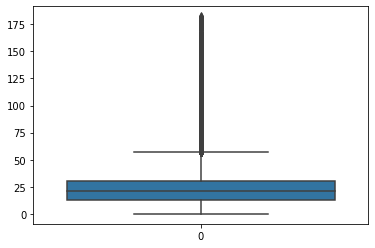

In [541]:
sns.boxplot(data=df.no2)

In [542]:
q1=df['rspm'].quantile(0.25)
q3=df['rspm'].quantile(0.75)
IQR=q3-q1
df=df[(df.rspm>l)&(df.rspm<H)]


<AxesSubplot:>

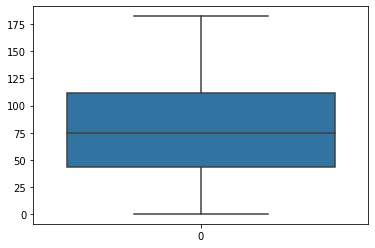

In [543]:

sns.boxplot(data=df.rspm)

In [544]:
q1=df['pm2_5'].quantile(0.25)
q3=df['pm2_5'].quantile(0.75)
IQR=q3-q1
df=df[(df.pm2_5>l)&(df.pm2_5<H)]

<AxesSubplot:>

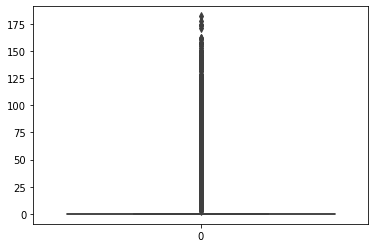

In [545]:
sns.boxplot(data=df.pm2_5)

In [546]:
corr=df.corr()

<AxesSubplot:>

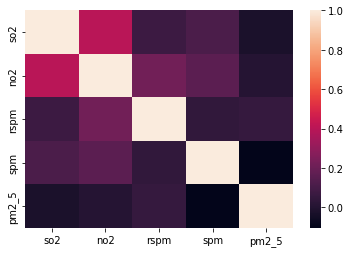

In [547]:
sns.heatmap(corr)

In [548]:
x=df.drop(['state'],axis=1)
y=df.state

In [549]:
x=pd.get_dummies(x)

In [550]:
x.dtypes

so2                                        float64
no2                                        float64
rspm                                       float64
spm                                        float64
pm2_5                                      float64
                                            ...   
type_Residential and others                  uint8
type_Residential, Rural and other Areas      uint8
type_Sensitive                               uint8
type_Sensitive Area                          uint8
type_Sensitive Areas                         uint8
Length: 321, dtype: object

In [551]:
df.dtypes

state        object
location     object
type         object
so2         float64
no2         float64
rspm        float64
spm         float64
pm2_5       float64
dtype: object

In [552]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0


In [553]:
df.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,0,0,0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,0,0,0.0,0.0,0.0,0.0,0.0
435741,Tripura,0,0,0.0,0.0,0.0,0.0,0.0


In [554]:
from sklearn.preprocessing import LabelEncoder


In [555]:
le=LabelEncoder()
y=le.fit_transform(y)


In [556]:
y=pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
341537,35
341538,35
341539,36
341540,17


In [557]:
y=pd.get_dummies(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
341537,35
341538,35
341539,36
341540,17


In [558]:
from sklearn.model_selection import train_test_split

In [559]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [560]:
y_train

,0
62402,9
215915,22
185991,19
167551,19
24188,2
...,...
122579,15
304137,32
152315,18
117952,15


In [561]:
from sklearn.linear_model import LogisticRegression

In [562]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Apeksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Apeksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [563]:
predict=lr.predict(x_test)

In [564]:
from sklearn.metrics import accuracy_score

In [565]:
acc=accuracy_score(y_test,predict)

In [566]:
acc

0.2316678622143495